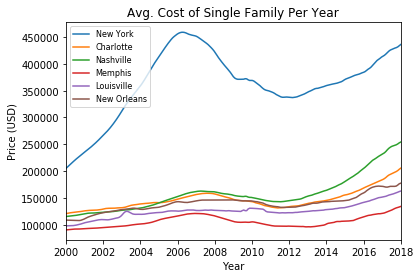

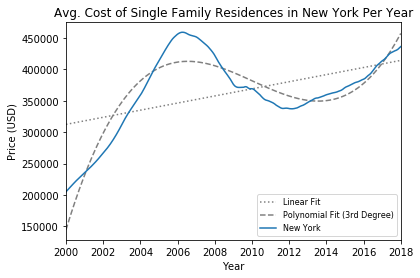

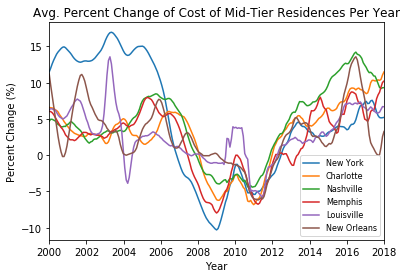

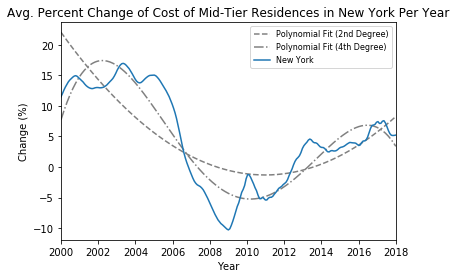

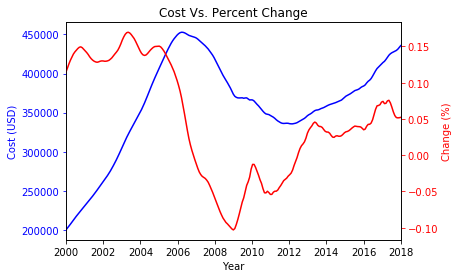

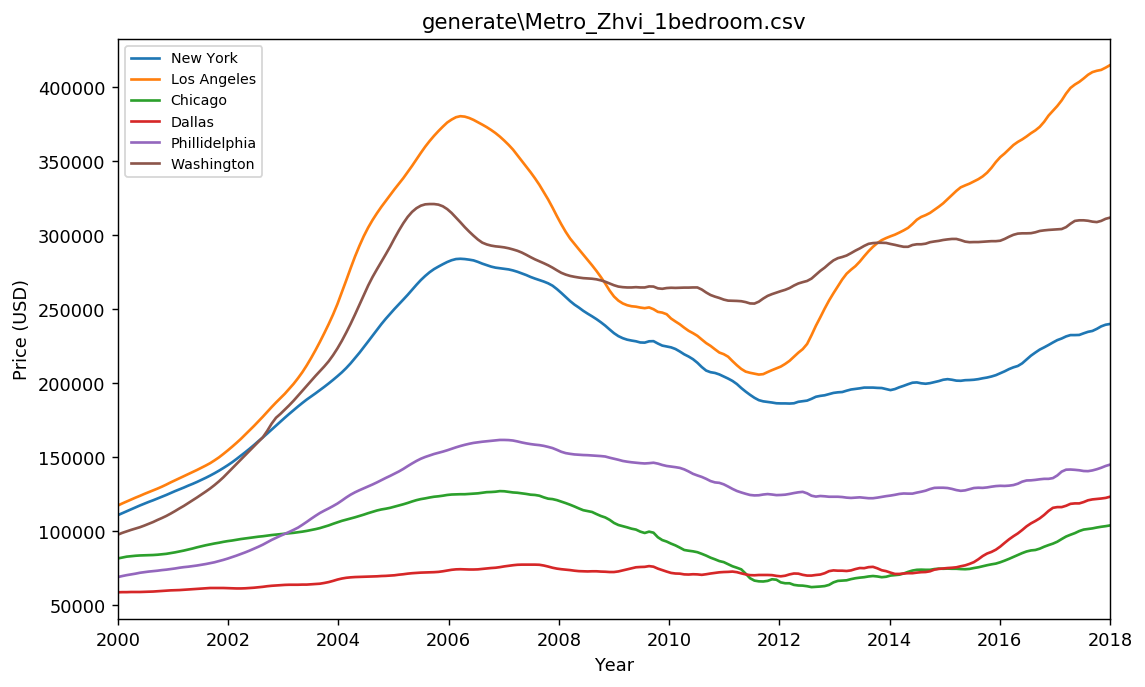

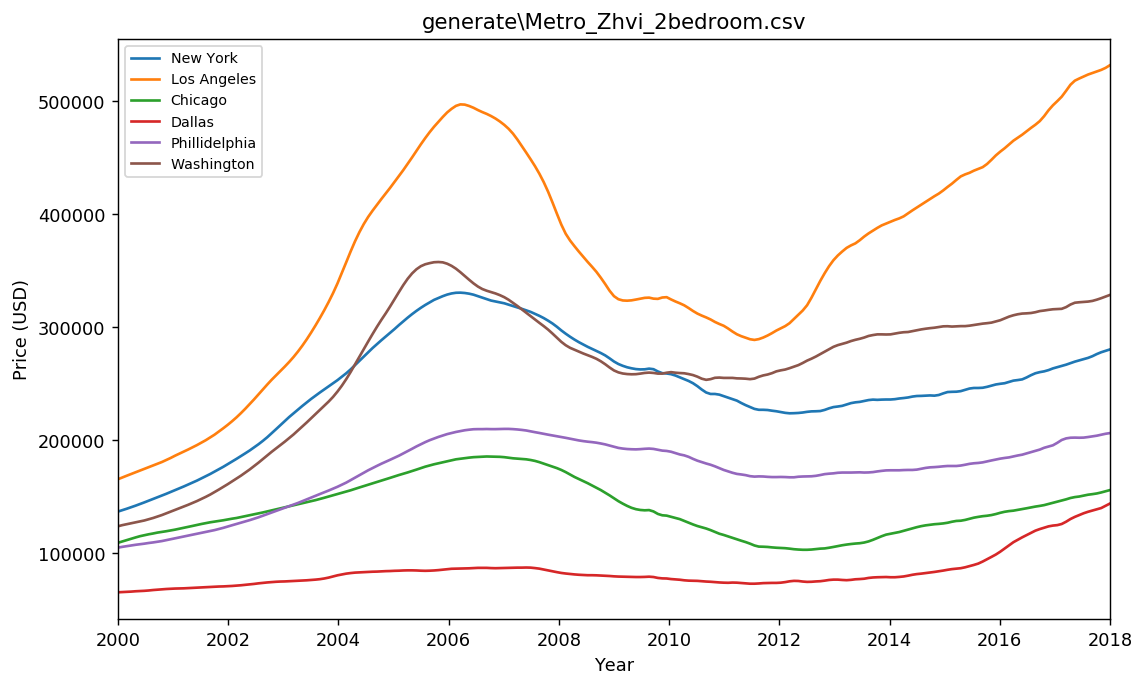

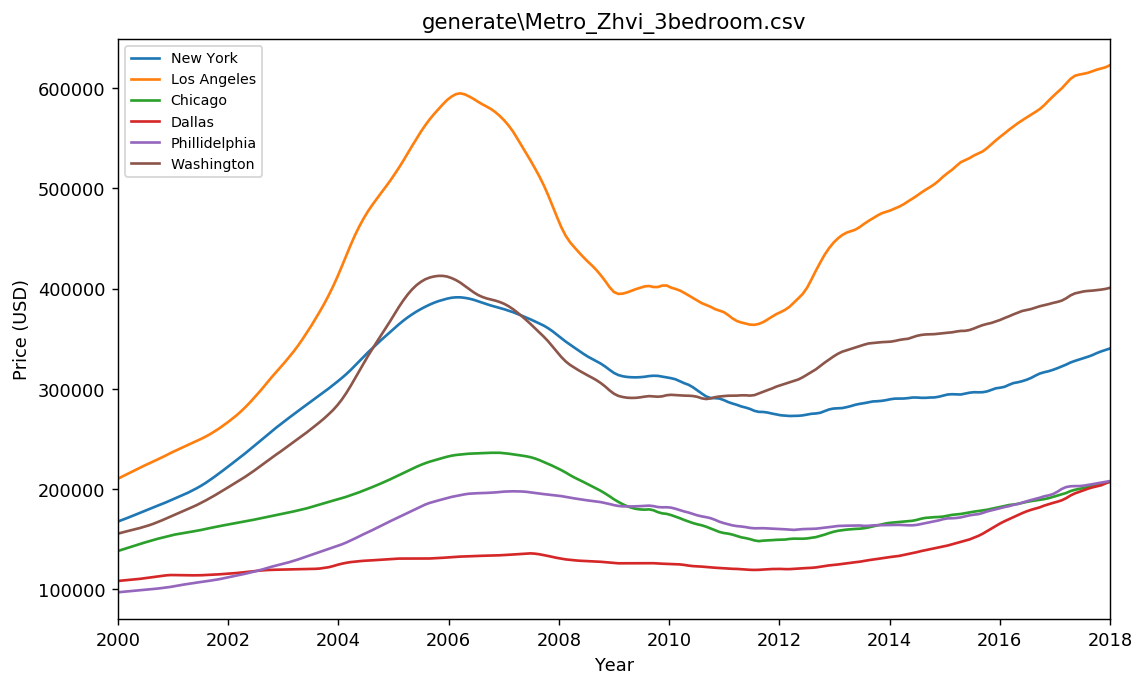

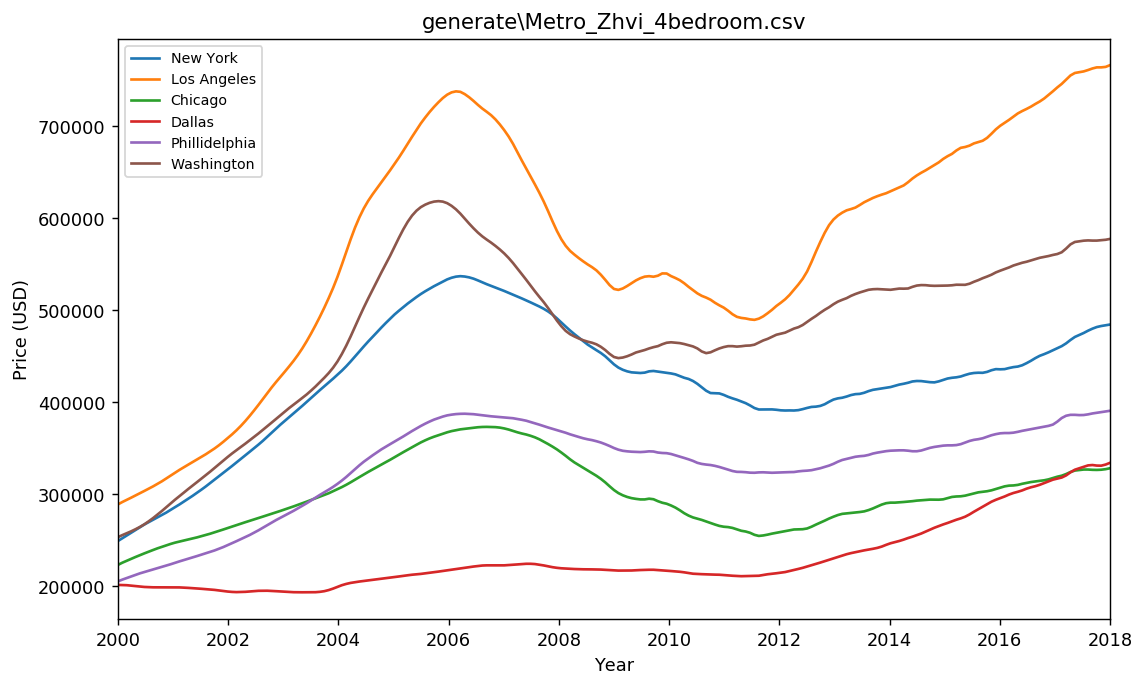

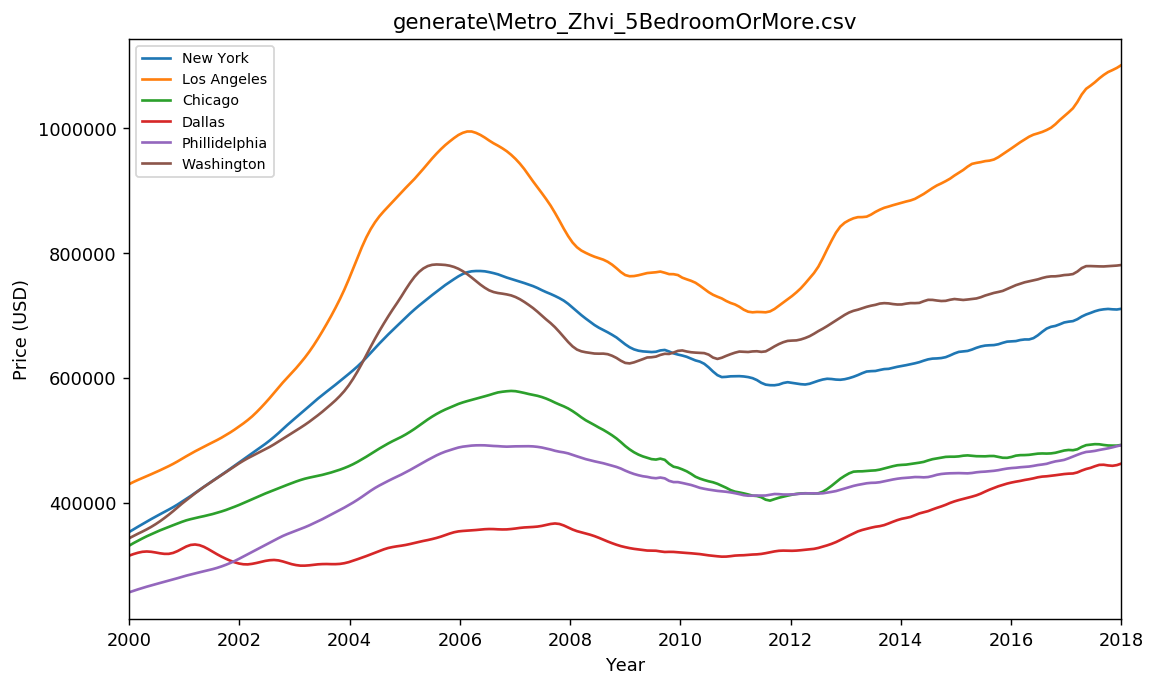

In [52]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import glob

# read csv file
f = open('Metro_Zhvi_SingleFamilyResidence.csv', 'r')
singleFamily = csv.reader(f)

# initialize lists for data from spreadsheet to be appended to
new_york = []
charlotte = []
louisville = []
nashville = []
memphis = []
new_orleans = []

# append data to initialized lists
rowNum = 0
for row in singleFamily:
    if rowNum > 47: #skips tracks row number and skips first 45 rows (data before 2000)
        new_york.append(float(row[2]))
        charlotte.append(float(row[25]))
        nashville.append(float(row[38]))
        memphis.append(float(row[42]))
        louisville.append(float(row[44]))
        new_orleans.append(float(row[47]))
    rowNum += 1

# create numpy array for dates
year = np.linspace(2000, 2018, 227)

# plot lines on graph
plt.plot(year, new_york, label = "New York")
plt.plot(year, charlotte, label = "Charlotte")
plt.plot(year, nashville, label = "Nashville")
plt.plot(year, memphis, label = "Memphis")
plt.plot(year, louisville, label = "Louisville")
plt.plot(year, new_orleans, label = "New Orleans")

#define plot parameters
plt.title("Avg. Cost of Single Family Per Year")
plt.xlabel('Year')
plt.xlim(2000, 2018)
plt.ylabel('Price (USD)')
plt.legend(loc = "upper left", prop = {'size': 8})
plt.savefig('SingleFamilyResidences.png')

# show first plot
plt.show()
f.close()

############################################################################

# create trendlines
trend = np.polyfit(year, new_york, 1)
trendArr = np.poly1d(trend)
trendCubed = np.polyfit(year, new_york, 3)
trendCubedArr = np.poly1d(trendCubed)

# plot trendlines
plt.plot(year, trendArr(year), color = "grey", linestyle = ":", label = "Linear Fit")
plt.plot(year, trendCubedArr(year), color = "grey", linestyle = '--', label = "Polynomial Fit (3rd Degree)")
plt.plot(year, new_york, label = "New York")

# set graph parameters
plt.title("Avg. Cost of Single Family Residences in New York Per Year")
plt.xlabel('Year')
plt.xlim(2000, 2018)
plt.ylabel('Price (USD)')
plt.legend(loc = "lower right", prop = {'size': 8})
plt.savefig('NewYorkTrends.png')
plt.show()

############################################################################

# read csv file
f = open('Metro_Zhvi_MiddleTier_yoy.csv', 'r')
middleTier = csv.reader(f)

# initialize lists for data from spreadsheet to be appended to
new_york_mid = []
charlotte_mid = []
louisville_mid = []
nashville_mid = []
memphis_mid = []
new_orleans_mid = []

# append data to initialized lists
rowNum = 0
for row in middleTier:
    if rowNum > 35: #skips tracks row number and skips first 45 rows (data before 2000)
        new_york_mid.append(float(row[2]) * 100)
        charlotte_mid.append(float(row[25]) * 100)
        nashville_mid.append(float(row[38]) * 100)
        memphis_mid.append(float(row[42]) * 100)
        louisville_mid.append(float(row[44]) * 100)
        new_orleans_mid.append(float(row[47]) * 100)
    rowNum += 1

# create numpy array for dates
year = np.linspace(2000, 2018, 227)

# plot lines on graph
plt.plot(year, new_york_mid, label = "New York")
plt.plot(year, charlotte_mid, label = "Charlotte")
plt.plot(year, nashville_mid, label = "Nashville")
plt.plot(year, memphis_mid, label = "Memphis")
plt.plot(year, louisville_mid, label = "Louisville")
plt.plot(year, new_orleans_mid, label = "New Orleans")

#define plot parameters
plt.title("Avg. Percent Change of Cost of Mid-Tier Residences Per Year")
plt.xlabel('Year')
plt.xlim(2000, 2018)
plt.ylabel('Percent Change (%)')
plt.legend(loc = "lower right", prop = {'size': 8})
plt.savefig('MidTierResidences.png')


# show first plot
plt.show()
f.close()

############################################################################

# create trendlines
trendSquared = np.polyfit(year, new_york_mid, 2)
trendSquaredArr = np.poly1d(trendSquared)
trendfour = np.polyfit(year, new_york_mid, 4)
trendfourArr = np.poly1d(trendfour)

# plot trendlines
plt.plot(year, trendSquaredArr(year), color = "grey", linestyle = '--', label = "Polynomial Fit (2nd Degree)")
plt.plot(year, trendfourArr(year), color = "grey", linestyle = '-.', label = "Polynomial Fit (4th Degree)")
plt.plot(year, new_york_mid, label = "New York")

# set graph parameters
plt.title("Avg. Percent Change of Cost of Mid-Tier Residences in New York Per Year")
plt.xlabel('Year')
plt.xlim(2000, 2018)
plt.ylabel('Change (%)')
plt.legend(loc = "upper right", prop = {'size': 8})
plt.savefig('NewYorkMidTrends.png')
plt.show()

############################################################################

# open files
f = open('Metro_Zhvi_MiddleTier.csv', 'r')
middle_tier_cost = csv.reader(f)
f2 = open('Metro_Zhvi_MiddleTier_yoy.csv', 'r')
middle_tier_change = csv.reader(f2)

# initiate lists
cost = []
change = []

# append data from files to lists
rowNum = 0
for row in middle_tier_cost:
    if rowNum > 47: #skips tracks row number and skips first 45 rows (data before 2000)
        cost.append(float(row[2]))
    rowNum += 1
rowNum = 0
for row in middle_tier_change:
    if rowNum > 35: #skips tracks row number and skips first 45 rows (data before 2000)
        change.append(float(row[2]))
    rowNum += 1

year = np.linspace(2000, 2018, 227)
    
# plot data into graph
fig, ax1 = plt.subplots()
plt.title("Cost Vs. Percent Change")
plt.xlabel('Year')
plt.xlim(2000, 2018)

ax1.plot(year, cost, 'b-')
ax1.set_ylabel('Cost (USD)', color = 'b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(year, change, 'r-')
ax2.set_ylabel('Change (%)', color = 'r')
ax2.tick_params('y', colors='r')

plt.show()
f.close()
f2.close()

############################################################################

for file in glob.glob("generate\\Metro_Zhvi_*.csv"):
    f = open(file, 'r')
    
    new_york = []
    los_angeles = []
    chicago = []
    dallas = []
    philly = []
    washington = []
    
    multi_bed = csv.reader(f)
    
    rowNum = 0
    for row in multi_bed:
        if rowNum > 47: #skips tracks row number and skips first 45 rows (data before 2000)
            new_york.append(float(row[2]))
            los_angeles.append(float(row[3]))
            chicago.append(float(row[4]))
            dallas.append(float(row[5]))
            philly.append(float(row[6]))
            washington.append(float(row[8]))
        rowNum += 1
    
    year = np.linspace(2000, 2018, 227)

    # plot lines on graph
    fig = plt.figure(dpi=128, figsize=(10, 6))
    
    plt.plot(year, new_york, label = "New York")
    plt.plot(year, los_angeles, label = "Los Angeles")
    plt.plot(year, chicago, label = "Chicago")
    plt.plot(year, dallas, label = "Dallas")
    plt.plot(year, philly, label = "Phillidelphia")
    plt.plot(year, washington, label = "Washington")
    
    plt.title(file)
    plt.xlabel('Year')
    plt.xlim(2000, 2018)
    plt.ylabel('Price (USD)')
    plt.legend(loc = "upper left", prop = {'size': 8})
    plt.savefig(file + '.png')

    